### TITPs Data Set 이용

In [1]:
## 경고 메세지 표시 안하기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [7]:
tips['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [8]:
tips['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [9]:
tips['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [10]:
tips['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

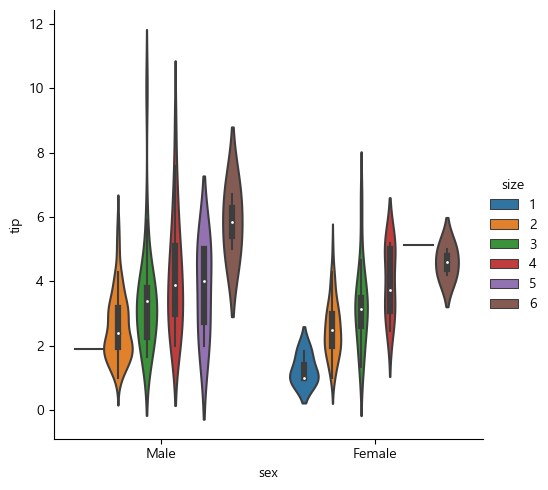

In [11]:
sns.catplot( x= 'sex', y = 'tip', hue = 'size', data = tips, kind = 'violin')

In [ ]:
#Kind 는 strip, swarm, box, boxen, point, bar, line, violin 등 

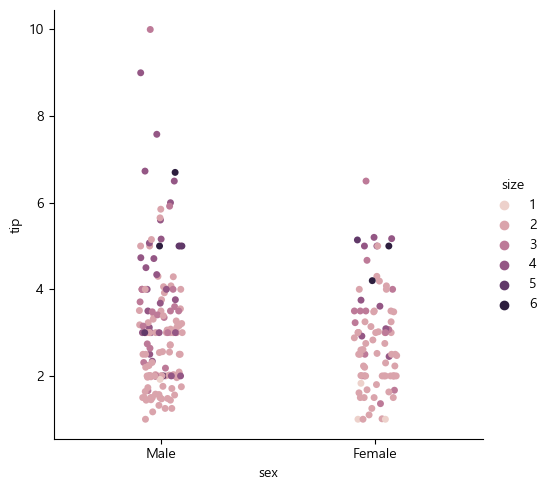

In [12]:
sns.catplot( x= 'sex', y = 'tip', hue = 'size', data = tips, kind = 'strip')

In [14]:
num = ['total_bill', 'tip', 'size' ]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tips[num] = scaler.fit_transform(tips[num])
tips

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,-0.600193
1,-1.063235,-0.969205,Male,No,Sun,Dinner,0.453383
2,0.137780,0.363356,Male,No,Sun,Dinner,0.453383
3,0.438315,0.225754,Male,No,Sun,Dinner,-0.600193
4,0.540745,0.443020,Female,No,Sun,Dinner,1.506958
...,...,...,...,...,...,...,...
239,1.040511,2.115963,Male,No,Sat,Dinner,0.453383
240,0.832275,-0.722971,Female,Yes,Sat,Dinner,-0.600193
241,0.324630,-0.722971,Male,Yes,Sat,Dinner,-0.600193
242,-0.221287,-0.904026,Male,No,Sat,Dinner,-0.600193


In [15]:
# 범부형의 sex, smokerr,day,time 을 자동으로 숫자 category 화

col = ['sex', 'smoker', 'day', 'time']
for r in col:
    tips[r+'_encoded'] = pd.Categorical(tips[r]).codes
    
tips


,total_bill,tip,sex,smoker,day,time,size,sex_encoded,smoker_encoded,day_encoded,time_encoded
0,-0.314711,-1.439947,Female,No,Sun,Dinner,-0.600193,1,1,3,1
1,-1.063235,-0.969205,Male,No,Sun,Dinner,0.453383,0,1,3,1
2,0.137780,0.363356,Male,No,Sun,Dinner,0.453383,0,1,3,1
3,0.438315,0.225754,Male,No,Sun,Dinner,-0.600193,0,1,3,1
4,0.540745,0.443020,Female,No,Sun,Dinner,1.506958,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...
239,1.040511,2.115963,Male,No,Sat,Dinner,0.453383,0,1,2,1
240,0.832275,-0.722971,Female,Yes,Sat,Dinner,-0.600193,1,0,2,1
241,0.324630,-0.722971,Male,Yes,Sat,Dinner,-0.600193,0,0,2,1
242,-0.221287,-0.904026,Male,No,Sat,Dinner,-0.600193,0,1,2,1


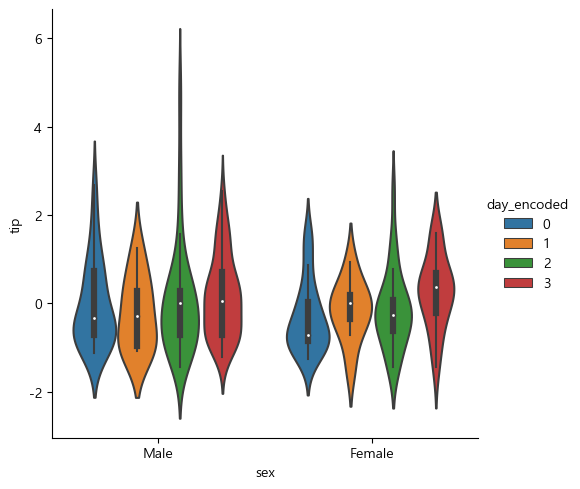

In [17]:
sns.catplot( x= 'sex', y = 'tip', hue = 'day_encoded', data = tips, kind = 'violin')

In [19]:
corr_matrix = tips.corr(numeric_only=True)
corr_matrix

,total_bill,tip,size,sex_encoded,smoker_encoded,day_encoded,time_encoded
total_bill,1.000000,0.675734,0.598315,-0.144877,-0.085721,0.173693,0.183118
tip,0.675734,1.000000,0.489299,-0.088862,-0.005929,0.135499,0.121629
size,0.598315,0.489299,1.000000,-0.086195,0.133178,0.165350,0.103411
sex_encoded,-0.144877,-0.088862,-0.086195,1.000000,0.002816,-0.230791,-0.205231
smoker_encoded,-0.085721,-0.005929,0.133178,0.002816,1.000000,0.032653,-0.054921
day_encoded,0.173693,0.135499,0.165350,-0.230791,0.032653,1.000000,0.874366
time_encoded,0.183118,0.121629,0.103411,-0.205231,-0.054921,0.874366,1.000000


In [20]:
heatmap_data = tips[['total_bill','tip','size','sex_encoded','day_encoded','time_encoded']]

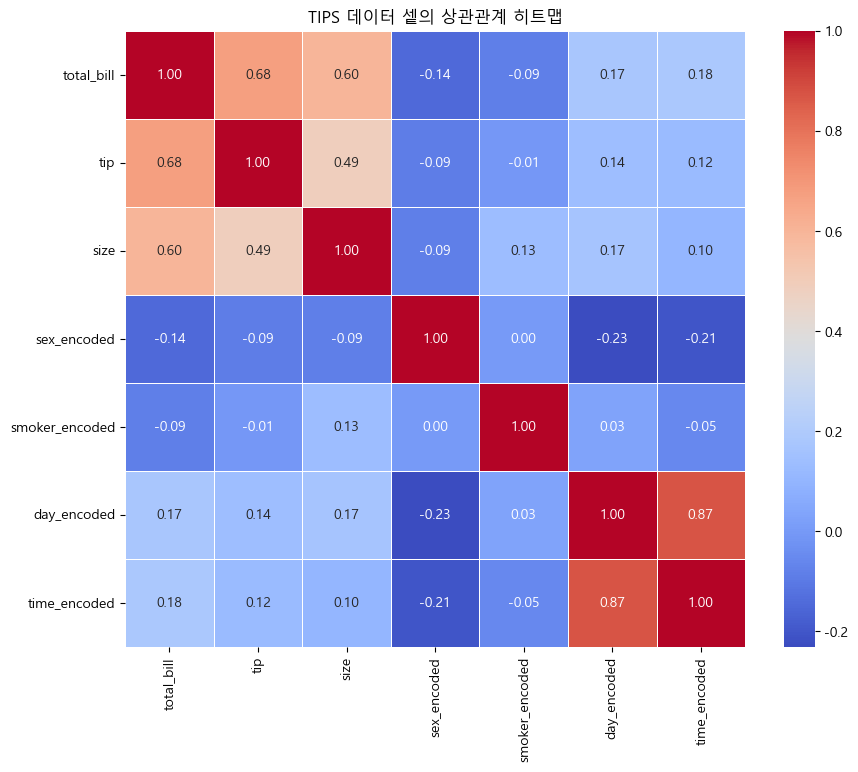

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths=.5)
plt.title('TIPS 데이터 셑의 상관관계 히트맵')
plt.show()      